# Exploratory Data Analysis

In this specific project, I want to learn more about the factors that affect outcomes in education. I found a dataset on [UCI's machine learning repository](https://archive.ics.uci.edu/ml/datasets/Student+Performance) containing academic information on students at two Portugese schools relating to two particular subjects: Portuguese and mathematics. In any data related project, the first step is to understand the data; so this notebook goes over that step of exploratory data analysis.

## Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Dataset Summary
File "student.txt" was provided with the dataset.

In [9]:
mat_df = pd.read_csv('../data/student-mat.csv', sep=';')
por_df = pd.read_csv('../data/student-por.csv', sep=';')

f = open('../data/student.txt', 'r')
print(f.read())

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2 sex - student's sex (binary: "F" - female or "M" - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: "U" - urban or "R" - rural)
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "

In [21]:
mat_df.describe().round(2)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00
mean,16.70,2.75,2.52,1.45,2.04,0.33,3.94,3.24,3.11,1.48,2.29,3.55,5.71,10.91,10.71,10.42
std,1.28,1.09,1.09,0.70,0.84,0.74,0.90,1.00,1.11,0.89,1.29,1.39,8.00,3.32,3.76,4.58
min,15.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,3.00,0.00,0.00
25%,16.00,2.00,2.00,1.00,1.00,0.00,4.00,3.00,2.00,1.00,1.00,3.00,0.00,8.00,9.00,8.00
50%,17.00,3.00,2.00,1.00,2.00,0.00,4.00,3.00,3.00,1.00,2.00,4.00,4.00,11.00,11.00,11.00
75%,18.00,4.00,3.00,2.00,2.00,0.00,5.00,4.00,4.00,2.00,3.00,5.00,8.00,13.00,13.00,14.00
max,22.00,4.00,4.00,4.00,4.00,3.00,5.00,5.00,5.00,5.00,5.00,5.00,75.00,19.00,19.00,20.00


In [22]:
por_df.describe().round(2)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00
mean,16.74,2.51,2.31,1.57,1.93,0.22,3.93,3.18,3.18,1.50,2.28,3.54,3.66,11.40,11.57,11.91
std,1.22,1.13,1.10,0.75,0.83,0.59,0.96,1.05,1.18,0.92,1.28,1.45,4.64,2.75,2.91,3.23
min,15.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00
25%,16.00,2.00,1.00,1.00,1.00,0.00,4.00,3.00,2.00,1.00,1.00,2.00,0.00,10.00,10.00,10.00
50%,17.00,2.00,2.00,1.00,2.00,0.00,4.00,3.00,3.00,1.00,2.00,4.00,2.00,11.00,11.00,12.00
75%,18.00,4.00,3.00,2.00,2.00,0.00,5.00,4.00,4.00,2.00,3.00,5.00,6.00,13.00,13.00,14.00
max,22.00,4.00,4.00,4.00,4.00,3.00,5.00,5.00,5.00,5.00,5.00,5.00,32.00,19.00,19.00,19.00


In [44]:
mat_df['school'].value_counts()

GP    349
MS     46
Name: school, dtype: int64

In [42]:
por_df['school'].value_counts()

GP    423
MS    226
Name: school, dtype: int64

In [45]:
mat_df['sex'].value_counts()

F    208
M    187
Name: sex, dtype: int64

In [46]:
por_df['sex'].value_counts()

F    383
M    266
Name: sex, dtype: int64

# Plots

## School

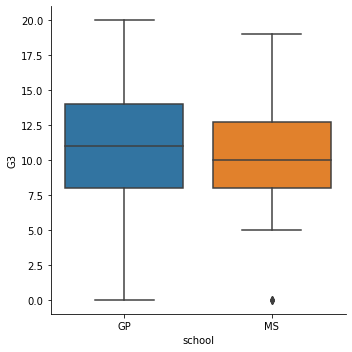

In [36]:
_ = sns.catplot(x='school', y='G3', data=mat_df, kind='box')

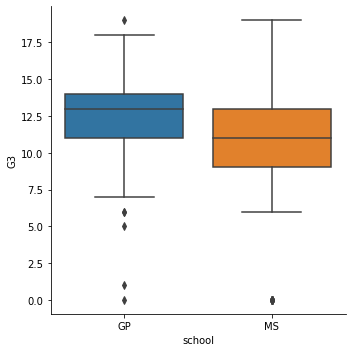

In [49]:
_ = sns.catplot(x='school', y='G3', data=por_df, kind='box')

## Sex

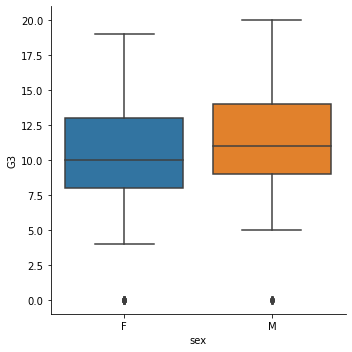

In [14]:
_ = sns.catplot(x='sex', y='G3', data=mat_df, kind='box')

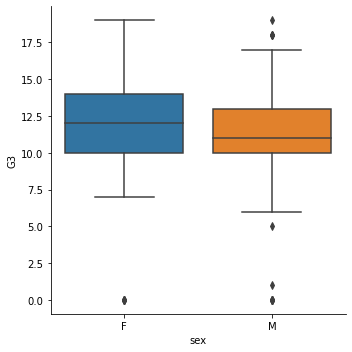

In [15]:
_ = sns.catplot(x='sex', y='G3', data=por_df, kind='box')

## Internet

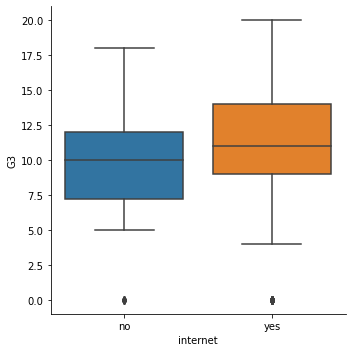

In [23]:
_ = sns.catplot(x='internet', y='G3', data=mat_df, kind='box')

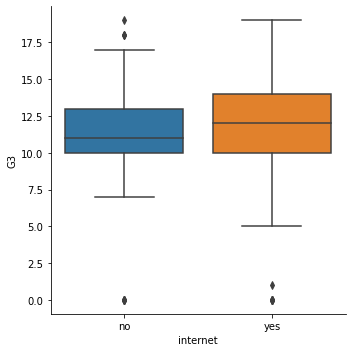

In [24]:
_ = sns.catplot(x='internet', y='G3', data=por_df, kind='box')

## Romantic

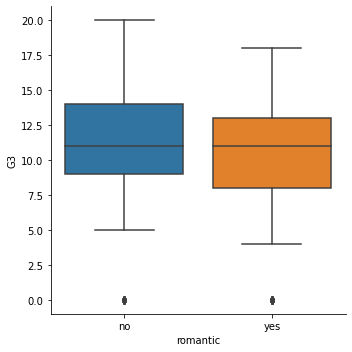

In [29]:
_ = sns.catplot(x='romantic', y='G3', data=mat_df, kind='box')

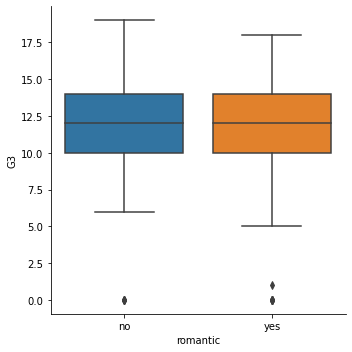

In [30]:
_ = sns.catplot(x='romantic', y='G3', data=por_df, kind='box')

## Health

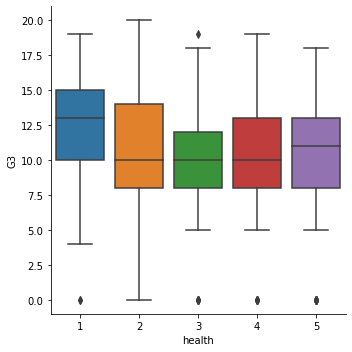

In [34]:
_ = sns.catplot(x='health', y='G3', data=mat_df, kind='box')

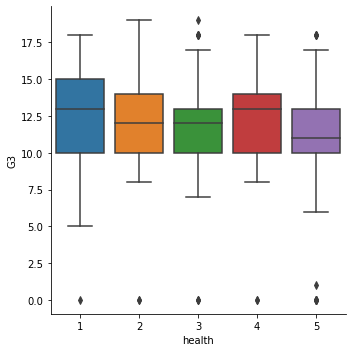

In [35]:
_ = sns.catplot(x='health', y='G3', data=por_df, kind='box')

# Findings
I've included a few of the box plots that I found interesting (especially in regards to end-of-year grades), since going through and visualizing every relationship would just create a bunch of clutter. The most interesting variables to me so far are "sex" and "internet", which indicate students' sex and internet-access. 

It seems that the stereotype that I heard as an American student that boys perform better at math and girls performance better at reading/writing still holds even in Portugal. Gender stereotypes aside, the difference in performance between students with and without internet access demonstrates to me the importance that federal governments should be placing on increasing internet access for its people - especially children.